# 1. Activation Functions:
    ● Define the sigmoid function, a popular activation function used in neural networks.<br>
    ● Define the tanh function, which is another common activation function that returns values between -1 and 1.<br>
    ● Define the relu function, which returns positive values as they are and zeroes out negative values

In [ ]:
#Sigmoid
#s(x) = 1/(1 + e**−x), where e ≈ 2.71
import pandas as pd
import numpy as np

def f_sigmoid(x):
    e_val = np.e
    z=(1/(1+ (e_val**-x)))
    return z

#tanh
#tanh = sinh / cosh = e**x - e**-x / (e**x + e**-x)

def f_tanh(x):
    #input is in radian (max 360)
    tanh = np.sinh(x)/np.cosh(x)
    return tanh

#ReLU
def f_relu(x):
    return max(0,x)



# 2. Sample Data:
● Use the following sample data for training: <br>
x1=3, x2=2, yactual=17

In [ ]:
x1=3
x2=2
yactual=17


# 3. Feed Forward:<br>
● Initialize the random weights w1 and w2 between 1 and 10.<br>
● Predict the output ypred using the equation ypred= x1 x w1 + x2 x w2

In [ ]:
w1 =  np.random.randint(1,10)
w2 =  np.random.randint(1,10)

def f_feed_forward(x1,x2,w1,w2):
    ypred = x1*w1 + x2*w2
    return ypred
print("Weights=",w1, w2)
ypred = f_feed_forward(x1,x2,w1,w2)
print("Predicted value=",ypred)

Weights= 5 5
Predicted value= 25


# 4. Error Calculation:<br>
● Compute the squared error as error = (yactual-ypred)*(yactual-ypred)

In [ ]:
#Loss = Sum {n, i=1} (y-y_hat)^2, y_hat = predicted value, y=actual value

error_squared = (yactual-ypred)*(yactual-ypred)
print("Actual=",yactual, " Predicted=",ypred, "Squared Error=",error_squared)

Actual= 17  Predicted= 25 Squared Error= 64


# 5. Back Propagation:
● Compute the gradients of the error with respect to the weights.<br>
● Update the weights using the computed gradients and a learning rate.

In [ ]:
'''Derivative
- Derivative tells us the rate of change at a given point in a real-valued function
- Example, the derivative f'(x) of function f() for variable x is the rate that the function f() changes at the point x.
- We can use derivatives in optimization problems as they tell us how to change inputs to the target function in
a way that increases or decreases the output of the function, so we can get closer to the minimum or maximum of the function.
'''
#weight new (w_new) = weight old (w_old)- learning rate (dL/dw)
#dL/dw - derivative of Loss wrt derivate of weight (slope of weight), here w = w_old
#dL/dw = dLoss/dOutput * dOutput/dWeight,    here Output is the weight related to the weight

def f_back_propogate(weight, loss, learning_rate = 0):
    learning_rate = 0.005 if learning_rate==0 else learning_rate
    weight_new=weight- (learning_rate*(loss/weight))
    return weight_new

w1_new=f_back_propogate(w1,error_squared)
w2_new=f_back_propogate(w2,error_squared)
print(w1,w1_new,":",w2,w2_new)

5 4.936 : 5 4.936


# 6. Training:<br>
    ● The above steps (Feed Forward to Back Propagation) are performed iteratively (20 times in this example) to refine the weights and minimize the error.
    - https://www.youtube.com/watch?v=CRB266Eyjkg&ab_channel=KrishNaik

In [ ]:
x1=3
x2=2
yactual=17
w1 =  np.random.randint(1,10)
w2 =  np.random.randint(1,10)

error=[]
predicted=[]
for z in range(20):
    print(f"Weights={w1} , {w2}", end=' : ')
    ypred = f_feed_forward(x1,x2,w1,w2)
    error_squared = (yactual-ypred)*(yactual-ypred)
    learning_rate = 0.008
    w1=f_back_propogate(w1,error_squared, learning_rate)
    w2=f_back_propogate(w2,error_squared, learning_rate)
    error.append(error_squared)
    predicted.append(ypred)
    print('Predicted=',ypred)


Weights=8 , 4 : Predicted= 32
Weights=7.775 , 3.55 : Predicted= 30.425000000000004
Weights=7.589553697749197 , 3.1438464788732388 : Predicted= 29.056354050994067
Weights=7.4363371279305746 , 2.7739666543214576 : Predicted= 27.856944692434638
Weights=7.30952926967804 , 2.4340252988737867 : Predicted= 26.796638406781693
Weights=7.204489264465822 , 2.1185836340147173 : Predicted= 25.850635061426903
Weights=7.1175060093147104 , 1.822786990510522 : Predicted= 24.998092008965177
Weights=7.045605008374038 , 1.5420324048484588 : Predicted= 24.22087983481903
Weights=6.986400888328223 , 1.271526517034667 : Predicted= 23.502255699054004
Weights=6.937987601027159 , 1.005519769337544 : Predicted= 22.825002341756566
Weights=6.898863112218391 , 0.7355646411250085 : Predicted= 22.16771861890519
Weights=6.867895324871653 , 0.44511766495350624 : Predicted= 21.49392130452197
Weights=6.844370995817772 , 0.08215155003473046 : Predicted= 20.697416087522775
Weights=6.828391867003597 , -1.2491329570493317 : P

# 7. Visualization:<br>
    ● Plot the progression of the error across epochs.<br>
    ● Plot the progression of ypred across epochs

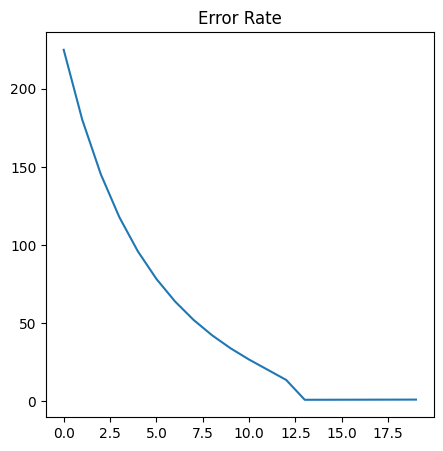

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(error)
plt.title("Error Rate")
plt.show()

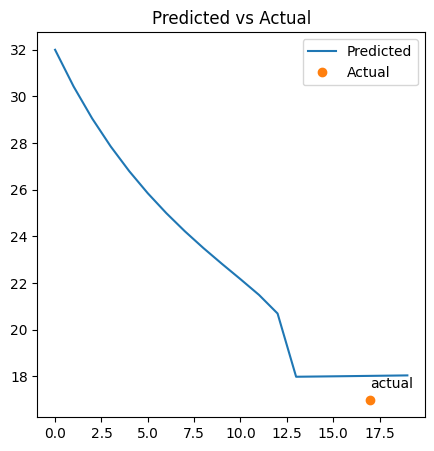

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Predicted vs Actual")
plt.plot(predicted)
plt.plot(yactual,yactual,'o')
plt.text(17,17.5,'actual')
plt.legend(['Predicted','Actual'])
plt.show()